<a href="https://colab.research.google.com/github/GouriNayak/DMDW/blob/main/Day3_SeabornCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install seaborn library

In [ ]:
pip install seaborn

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Visualizing Statistical Relationships**

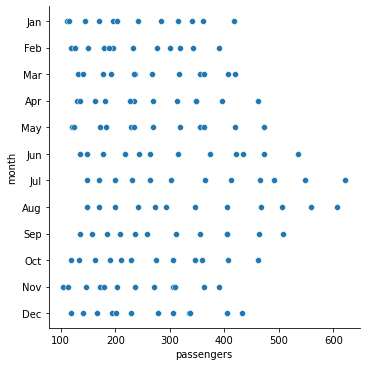

In [ ]:
a = sns.load_dataset("flights")
sns.relplot(x="passengers",y="month",data=a)

plot on Huge Symantec

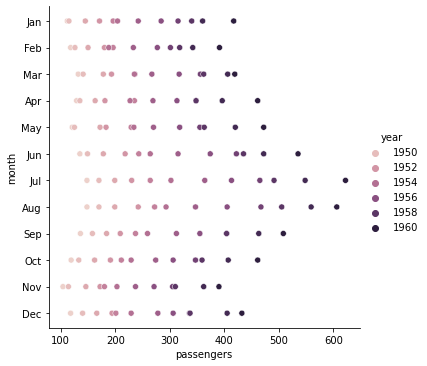

In [ ]:
a = sns.load_dataset("flights")
sns.relplot(x="passengers",y="month",hue="year",data=a)

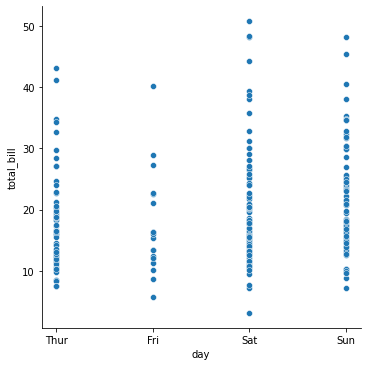

In [ ]:
b = sns.load_dataset("tips")
sns.relplot(x="day",y="total_bill",data=b)

Plotting with **Categorical Data**

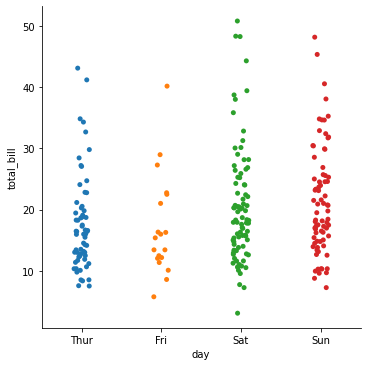

In [ ]:
sns.catplot(x="day",y="total_bill",data=b)

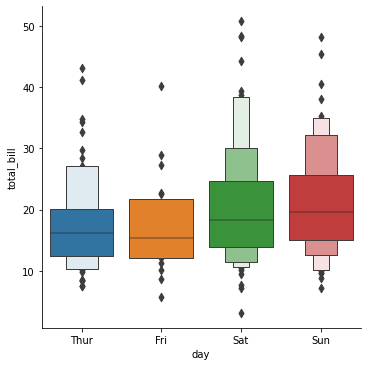

In [ ]:
sns.catplot(x="day",y="total_bill",kind="boxen",data=b)

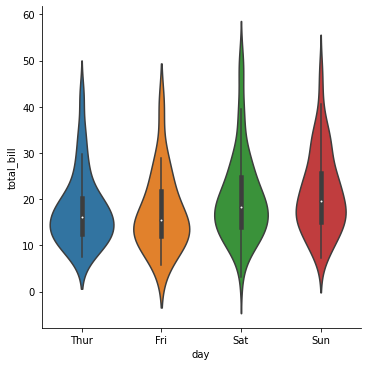

In [ ]:
sns.catplot(x="day",y="total_bill",kind="violin",data=b)

Visualizing the **distribution** of a dataset

In [ ]:
from scipy import stats

In [ ]:
c = np.random.normal(loc=5, size=100, scale=2)

**Univariate Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


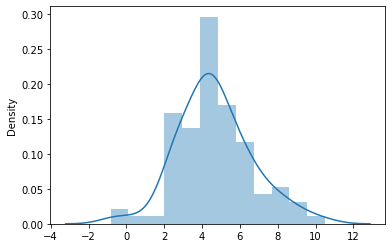

In [ ]:
sns.distplot(c)

**Bivariate Distribution**

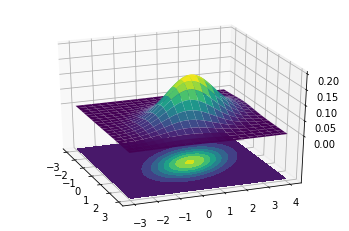

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

**Multi-Plot Grids**

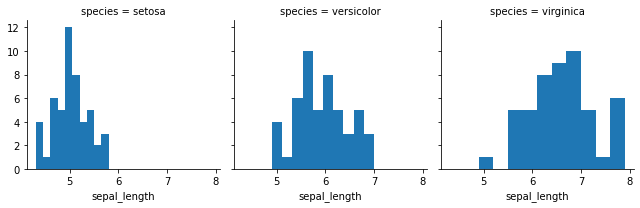

In [ ]:
a=sns.load_dataset("iris")
b=sns.FacetGrid(a, col="species")
b.map(plt.hist, "sepal_length")

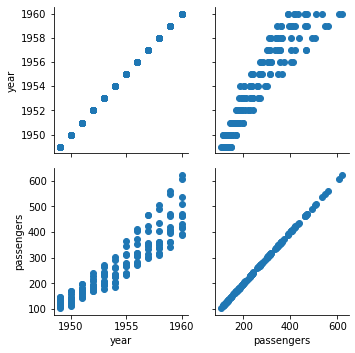

In [ ]:
a=sns.load_dataset("flights")
b=sns.PairGrid(a)
b.map(plt.scatter)

Background Theme change

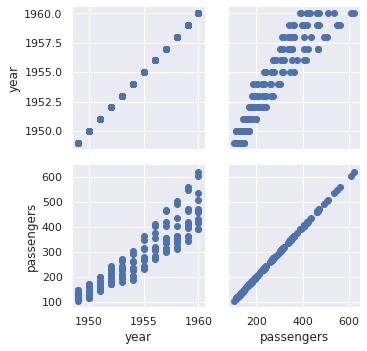

In [ ]:
sns.set(style="darkgrid")
a=sns.load_dataset("flights")
b=sns.PairGrid(a)
b.map(plt.scatter)